In [1]:
import pandas as pd

# se importa el archivo creado en la subcarpeta ETL y se crea un dataframe 
users_reviews = pd.read_parquet("D:/Users/Cesar/Desktop/Proyecto_individial_1/Data_ingeneria/ETL/users_reviews_ETL")
users_reviews.replace({None: pd.NA}, inplace=True)
users_reviews.to_json("users_reviews",index=False)



In [2]:
users_reviews.head()

,user_id,posted,item_id,helpful,recommend,review
0,76561197970982479,"Posted November 5, 2011.",1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,"Posted July 15, 2011.",22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,"Posted April 21, 2011.",43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,"Posted June 24, 2014.",251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,"Posted September 8, 2013.",227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...


In [3]:
# hacemos tambien analisis descriptivo de todas la columnas 

users_reviews.describe(include='all')

# podemos observar que tenemos solo una variable numerica "item_id" segun los datos estan podria estar sesgada ala valores
# mas bajos ala izquierda mas adelante lo confiemaremos con histograma, para las variables numericas por ejemplo "recommend"
# observamos 59305 valores no hay nulos, tambien tiene dos valores unicos, el de mayor frecuencia es true y se presenta 52473

,user_id,posted,item_id,helpful,recommend,review
count,59305,59305,59305.0,59305,59305,59305
unique,25458,1906,<NA>,1344,2,55313
top,76561198094665607,"Posted June 21, 2014.",<NA>,No ratings yet,True,good game
freq,20,225,<NA>,30168,52473,100
mean,NaN,NaN,169935.176511,NaN,NaN,NaN
std,NaN,NaN,132029.464174,NaN,NaN,NaN
min,NaN,NaN,10.0,NaN,NaN,NaN
25%,NaN,NaN,8930.0,NaN,NaN,NaN
50%,NaN,NaN,218230.0,NaN,NaN,NaN
75%,NaN,NaN,261760.0,NaN,NaN,NaN


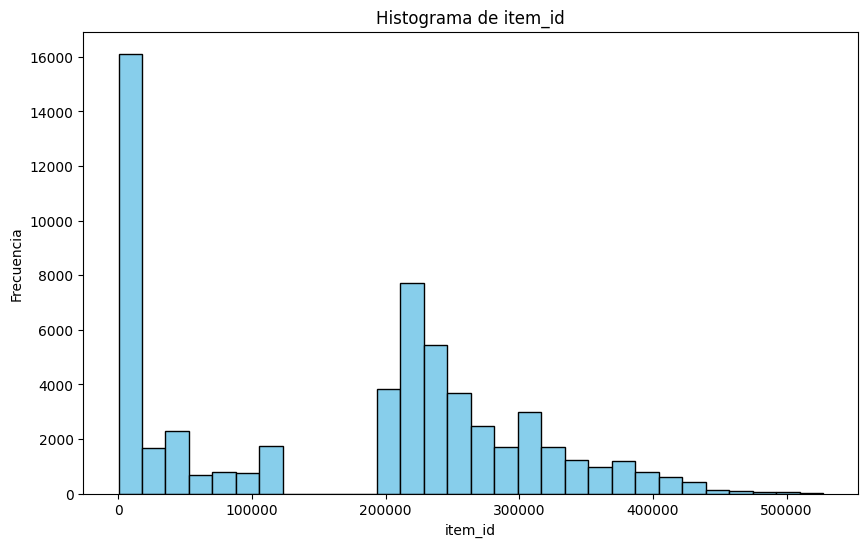

In [4]:
import matplotlib.pyplot as plt

# ejecutamos la liena de codigo para revisar atravez de un histograma la distribucion de la columna numerica "item_id"
plt.figure(figsize=(10, 6))
plt.hist(users_reviews['item_id'], bins=30, color='skyblue', edgecolor='black') 
plt.title('Histograma de item_id')
plt.xlabel('item_id')
plt.ylabel('Frecuencia')
plt.show()

# La distribución puede estar sesgada hacia la izquierda, lo que significa que hay más valores hacia el extremo
# inferior de la escala y menos hacia el extremo superior


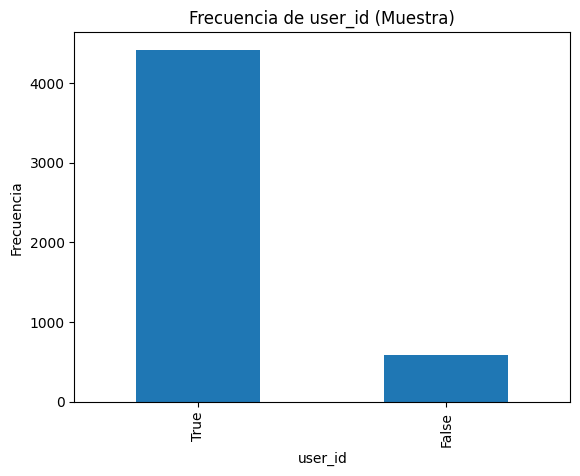

In [5]:
# en esta parte del codigo hacemos uso de graficos de barra por ejemplo para la columna "recommend" que es variable categorica
# para determinar la dominancia de True o False y la distribucion de las mismas para las demas vasriables categoricas no es
# hacer eso debido a que tiene muchos valores unicos lo cual dificulta la claridad de la grafica 
 
sample_data = users_reviews['recommend'].sample(n=5000)  # Ajusta el tamaño de la muestra según sea necesario
sample_data.value_counts().plot(kind='bar')
plt.title('Frecuencia de user_id (Muestra)')
plt.xlabel('user_id')
plt.ylabel('Frecuencia')
plt.show()

# con esto determinamos que "true" es mas dominate y representativo en la columna recommend es decir que en la paguina
# hay hay juegos que tienen bastante aceptacion 